In [4]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [46]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [47]:
len(x_train)

60000

In [10]:
len(x_test)

10000

In [48]:
x_train[0].shape

(28, 28)

28*28 represents pixels

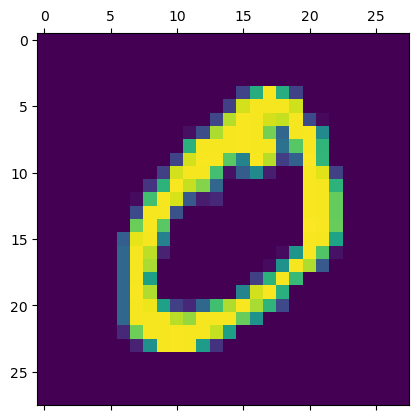

In [49]:
plt.matshow(x_train[1])

In [50]:
y_train[1]

0

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [53]:
x_train=x_train/255
x_test=x_test/255

In [54]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [55]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [56]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [80]:
model = keras.Sequential(
    [
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step - accuracy: 0.8166 - loss: 0.7156
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.9121 - loss: 0.3134
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.9210 - loss: 0.2823
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.9219 - loss: 0.2770
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.9255 - loss: 0.2685


In [59]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.9140 - loss: 0.3040


[0.26798105239868164, 0.9261000156402588]

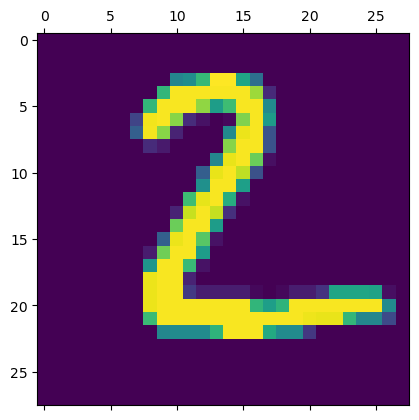

In [60]:
plt.matshow(x_test[1])

In [63]:
y_predicted=model.predict(x_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


array([2.8848213e-01, 4.5980755e-03, 9.9969035e-01, 3.0138686e-01,
       4.0505010e-10, 8.1513882e-01, 8.0231082e-01, 9.7291869e-13,
       1.6801862e-01, 3.2252061e-09], dtype=float32)

In [64]:
np.argmax(y_predicted[1])

2

argmax finds the index of the largest value

In [65]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [66]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [68]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    7,    8,    2,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    8,  939,    9,    7,    4,   10,    9,   40,    3],
       [   1,    0,   25,  914,    0,   27,    2,   10,   23,    8],
       [   1,    1,    8,    0,  917,    0,    9,    4,   11,   31],
       [   6,    3,    9,   26,   10,  781,    9,    7,   35,    6],
       [  11,    3,    9,    1,    7,   17,  905,    2,    3,    0],
       [   1,    5,   26,    5,    8,    0,    0,  953,    4,   26],
       [   3,    7,    7,   22,    9,   23,    7,   11,  880,    5],
       [   8,    7,    2,   11,   30,    7,    0,   24,   13,  907]])>

Text(95.72222222222221, 0.5, 'Truth')

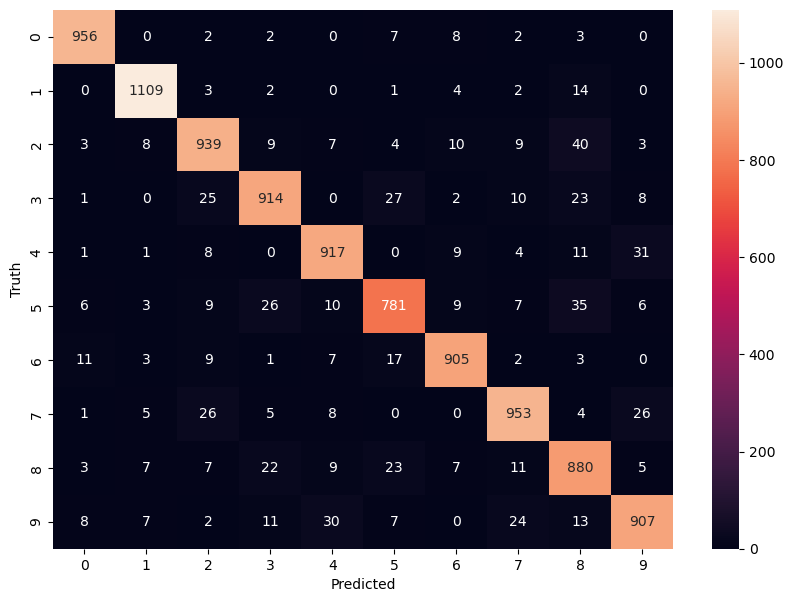

In [72]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [82]:
model = keras.Sequential(
    [
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8714 - loss: 0.4574
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9627 - loss: 0.1282
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9767 - loss: 0.0826
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9814 - loss: 0.0608
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9861 - loss: 0.0480


In [83]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.9716 - loss: 0.0871


[0.07387175410985947, 0.9765999913215637]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

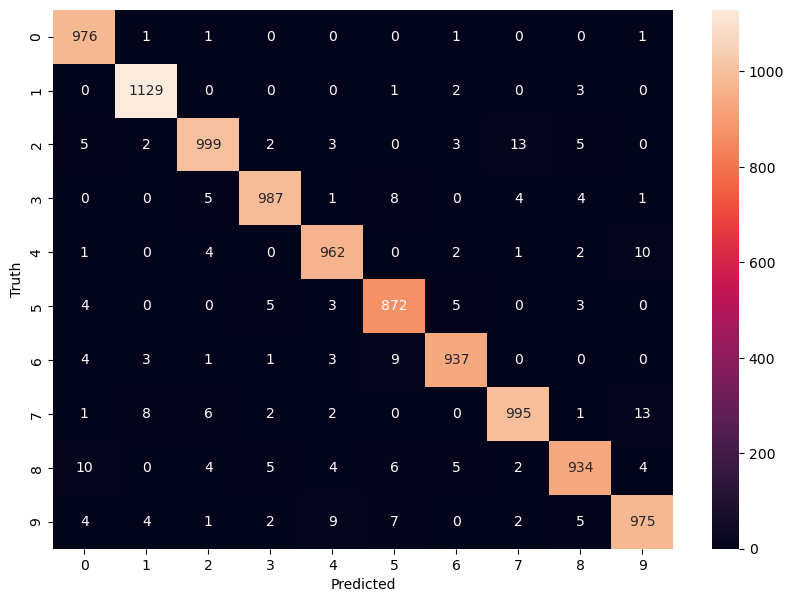

In [84]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
model = keras.Sequential(
    [   keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

C:\Users\dhanu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8686 - loss: 0.4619
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9598 - loss: 0.1377
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9738 - loss: 0.0890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9794 - loss: 0.0678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9844 - loss: 0.0521
